# Objective: Classify BBC News Categories
* https://github.com/jinokwon/AI-Model-Share-Competition-at-Columbia/blob/master/ML_DL_Project_3_Classifying_BBC_News_Categories.ipynb
* the data includes news articles from the BBC news.




In [0]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv")
df.shape

(2225, 2)

In [0]:
df.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


## 1. Visualization of the target variable categories

Text(0, 0.5, 'Number')

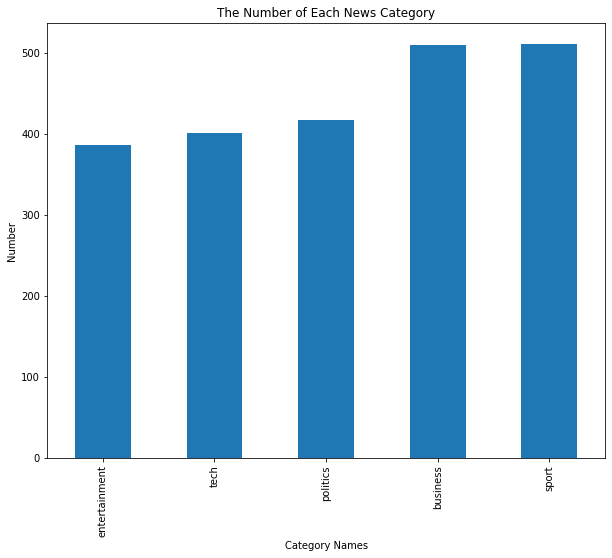

In [0]:
bar = df['category'].value_counts().sort_values().plot(kind='bar',
                                        figsize=(10,8),
                                        title="The Number of Each News Category")
bar.set_xlabel("Category Names")
bar.set_ylabel("Number")

**Observation**: We seem to have a fairly balanced dataset across different categories. 'Sport' is the category with the highest frequency (count), while 'Entertainment' is the one with the lowest count.

## 2.  Preprocess the data
* I will preprocess the data in a way that each document in the data is represented as a sequence of equal length.

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
X = df['text'].tolist()
le = LabelEncoder()
y = le.fit_transform(df['category'])
y = to_categorical(y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
# Tokenize the data into one hot vectors
maxlen = 100  # We will cut reviews after 100 words
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train) # converts words in each text to each word's numeric index in tokenizer dictionary.

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(y_train)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 27066 unique tokens.
Shape of data tensor: (1780, 100)
Shape of label tensor: (1780, 5)


In [0]:
# Split the data into a training set and a validation set
# But first, shuffle the data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

X_train = data
y_train = labels

In [0]:
sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(y_test)

## Use the data to fit separate DL models to each of the following architectures:
- A. A model with an embedding layer and dense layers (but w/ no layers meant for sequential data)
- B. A model using an Embedding layer with Conv1d Layers
- C. A model using an Embedding layer with one sequential layer (LSTM or GRU)
- D. A model using an Embedding layer with stacked sequential layers (LSTM or GRU)
- E. A model using an Embedding layer with bidirectional sequential layers
- F. Now retrain my best model from C, D, and E using dropout (with increased epochs!).

### A. A model with an embedding layer and dense layers (but w/ no layers meant for sequential data)

In [0]:
# Let's start with a model that ignores the sequential steps that make up each observation
from keras.layers import Dense, Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# Specify the size of your vocabulary (i.e.-10,000 terms)
# Specify the number of features you want to extract via fitting weights to your embedding matrix.
# We also specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs 
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 8)            80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 4005      
Total params: 84,005
Trainable params: 84,005
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1424 samples, validate on 356 samples
Epoch 1/30
1424/1424 [==============================] - 0s 132us/step - loss: 1.6078 - acc: 0.2177 - val_loss: 1.6007 - val_acc: 0.2893
Epoch 2/30
1424/1424 [==============================] - 0s 78us/step - loss: 1.5711 - acc: 0.4663 - val_loss: 1.5828 - val_acc: 0.3455
Epoch 3/30
1424/1424 [==============================] - 0s 75us/step - loss: 1.5125 - acc: 0.6025 - val_loss: 1.5372 - val_acc: 0.4382
Epoch 4/30
1424/1424 [==============================] - 0s 76us/step - loss: 1.4011 - acc: 0.6545 - val_loss: 1.4337 - val_acc: 0.5225
Epoch 5/30
1424/1424 [==============================] - 0s 78us/step - loss: 1.2232 - acc: 0.7353 - val_loss: 1.2900 - val_acc: 0.5815
Epoch 6/30
1424/1424 [==============================] - 0s 79us/step - loss: 1.0189 - acc: 0.8265 - val_loss: 1.1532 - val_acc: 0.6264
Epoch 7/30
1424/1424 [==============================] - 0s 78us/step - loss: 0.8244 - acc: 0.8855 - val_loss: 1.0397 - val_acc: 0.6770
Epoch 8

In [0]:
model.evaluate(X_test, y_test)

445/445 [==============================] - 0s 53us/step


[0.6233817219734192, 0.7797752618789673]

## B. A model using an Embedding layer with Conv1d Layers

In [0]:
# Use 1D Conv layer rather than RNN or LSTM or GRU to fit model

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(5, activation='softmax'))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 94, 32)            28704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 18, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 12, 32)            7200      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 1,316,069
Trainable params: 1,316,069
Non-trainable params: 0
____________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1424 samples, validate on 356 samples
Epoch 1/30
1424/1424 [==============================] - 1s 912us/step - loss: 1.6058 - acc: 0.2240 - val_loss: 1.5927 - val_acc: 0.2781
Epoch 2/30
1424/1424 [==============================] - 1s 835us/step - loss: 1.5912 - acc: 0.2381 - val_loss: 1.5902 - val_acc: 0.2781
Epoch 3/30
1424/1424 [==============================] - 1s 826us/step - loss: 1.5817 - acc: 0.2486 - val_loss: 1.5886 - val_acc: 0.2809
Epoch 4/30
1424/1424 [==============================] - 1s 842us/step - loss: 1.5731 - acc: 0.3083 - val_loss: 1.5875 - val_acc: 0.2893
Epoch 5/30
1424/1424 [==============================] - 1s 840us/step - loss: 1.5652 - acc: 0.3736 - val_loss: 1.5860 - val_acc: 0.3062
Epoch 6/30
1424/1424 [==============================] - 1s 832us/step - loss: 1.5575 - acc: 0.4199 - val_loss: 1.5849 - val_acc: 0.3202
Epoch 7/30
1424/1424 [==============================] - 1s 838us/step - loss: 1.5498 - acc: 0.4445 - val_loss: 1.5835 - val_acc: 0.3202
E

In [0]:
model.evaluate(X_test, y_test)

445/445 [==============================] - 0s 201us/step


[1.5033330086911663, 0.45617976784706116]

## C. A model using an Embedding layer with one sequential layer (LSTM or GRU)

In [0]:
from keras.layers import SimpleRNN, LSTM
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1424 samples, validate on 356 samples
Epoch 1/30
1424/1424 [==============================] - 1s 1000us/step - loss: 1.6056 - acc: 0.2268 - val_loss: 1.5781 - val_acc: 0.2949
Epoch 2/30
1424/1424 [==============================] - 1s 913us/step - loss: 1.4504 - acc: 0.4614 - val_loss: 1.5633 - val_acc: 0.2949
Epoch 3/30
1424/1424 [==============================] - 1s 915us/step - loss: 1.2322 - acc: 0.6468 - val_loss: 1.6246 - val_acc: 0.2416
Epoch 4/30
1424/1424 [==============================] - 1s 891us/step - loss: 0.9712 - acc: 0.7725 - val_loss: 1.6188 - val_acc: 0.2949
Epoch 5/30
1424/1424 [==============================] - 1s 880us/step - loss: 0.5674 - acc: 0.9291 - val_loss: 1.6381 - val_acc: 0.3118
Epoch 6/30
1424/1424 [==============================] - 1s 888us/step - loss: 0.2807 - acc: 0.9817 - val_loss: 1.7206 - val_acc: 0.3146
Epoch 7/30
1424/1424 [==============================] - 1s 867us/step - loss: 0.1165 - acc: 1.0000 - val_loss: 1.8281 - val_acc: 0.3090


In [0]:
model.evaluate(X_test, y_test)

445/445 [==============================] - 0s 154us/step


[2.4770825552136713, 0.32359549403190613]

## D. A model using an Embedding layer with stacked sequential layers (LSTM or GRU)

In [0]:
# Stacked RNN layers

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1424 samples, validate on 356 samples
Epoch 1/30
1424/1424 [==============================] - 4s 3ms/step - loss: 1.6555 - acc: 0.2065 - val_loss: 1.5930 - val_acc: 0.2781
Epoch 2/30
1424/1424 [==============================] - 4s 3ms/step - loss: 1.5112 - acc: 0.3301 - val_loss: 1.6701 - val_acc: 0.2444
Epoch 3/30
1424/1424 [==============================] - 4s 3ms/step - loss: 1.0992 - acc: 0.6025 - val_loss: 1.7648 - val_acc: 0.2978
Epoch 4/30
1424/1424 [==============================] - 4s 3ms/step - loss: 0.5656 - acc: 0.8427 - val_loss: 2.0465 - val_acc: 0.3006
Epoch 5/30
1424/1424 [==============================] - 4s 3ms/step - loss: 0.2372 - acc: 0.9515 - val_loss: 2.2094 - val_acc: 0.3174
Epoch 6/30
1424/1424 [==============================] - 4s 3ms/step - loss: 0.0677 - acc: 0.9986 - val_loss: 2.4202 - val_acc: 0.3174
Epoch 7/30
1424/1424 [==============================] - 4s 3ms/step - loss: 0.0261 - acc: 1.0000 - val_loss: 2.6041 - val_acc: 0.3174
Epoch 8/30
1424

In [0]:
model.evaluate(X_test, y_test)

445/445 [==============================] - 0s 546us/step


[4.0775060685832845, 0.307865172624588]

## E. A model using an Embedding layer with bidirectional sequential layers

In [0]:
model = Sequential()
model.add(layers.Embedding(max_words, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, 
                    epochs=30, 
                    batch_size=128, 
                    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1424 samples, validate on 356 samples
Epoch 1/30
1424/1424 [==============================] - 3s 2ms/step - loss: 1.6073 - acc: 0.2135 - val_loss: 1.5986 - val_acc: 0.2753
Epoch 2/30
1424/1424 [==============================] - 2s 1ms/step - loss: 1.6031 - acc: 0.2346 - val_loss: 1.5929 - val_acc: 0.2781
Epoch 3/30
1424/1424 [==============================] - 2s 1ms/step - loss: 1.6006 - acc: 0.2247 - val_loss: 1.5905 - val_acc: 0.2781
Epoch 4/30
1424/1424 [==============================] - 2s 1ms/step - loss: 1.5977 - acc: 0.2353 - val_loss: 1.5913 - val_acc: 0.3287
Epoch 5/30
1424/1424 [==============================] - 2s 1ms/step - loss: 1.5954 - acc: 0.2732 - val_loss: 1.5905 - val_acc: 0.3174
Epoch 6/30
1424/1424 [==============================] - 2s 1ms/step - loss: 1.5922 - acc: 0.3420 - val_loss: 1.5878 - val_acc: 0.3427
Epoch 7/30
1424/1424 [==============================] - 2s 1ms/step - loss: 1.5874 - acc: 0.3567 - val_loss: 1.5772 - val_acc: 0.2809
Epoch 8/30
1424

In [0]:
model.evaluate(X_test, y_test)

445/445 [==============================] - 0s 485us/step


[1.1654932973090182, 0.5865168571472168]

## F. Now retrain my best model from C, D, and E using dropout (with increased epochs!)
* Model E is my best model.

In [0]:
model = Sequential()
model.add(layers.Embedding(max_words, 32))
# I'm adding dropout here.
model.add(layers.Bidirectional(layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2)))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, 
                    epochs=50,  # increased epochs 
                    batch_size=128, 
                    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1424 samples, validate on 356 samples
Epoch 1/50
1424/1424 [==============================] - 3s 2ms/step - loss: 1.6075 - acc: 0.2289 - val_loss: 1.6018 - val_acc: 0.2360
Epoch 2/50
1424/1424 [==============================] - 2s 1ms/step - loss: 1.6028 - acc: 0.2331 - val_loss: 1.5970 - val_acc: 0.2893
Epoch 3/50
1424/1424 [==============================] - 2s 1ms/step - loss: 1.6002 - acc: 0.2633 - val_loss: 1.5933 - val_acc: 0.2837
Epoch 4/50
1424/1424 [==============================] - 2s 1ms/step - loss: 1.5978 - acc: 0.2760 - val_loss: 1.5950 - val_acc: 0.2247
Epoch 5/50
1424/1424 [==============================] - 2s 1ms/step - loss: 1.5954 - acc: 0.2662 - val_loss: 1.5921 - val_acc: 0.2388
Epoch 6/50
1424/1424 [==============================] - 2s 1ms/step - loss: 1.5910 - acc: 0.2690 - val_loss: 1.5884 - val_acc: 0.3090
Epoch 7/50
1424/1424 [==============================] - 2s 1ms/step - loss: 1.5874 - acc: 0.3223 - val_loss: 1.5853 - val_acc: 0.2781
Epoch 8/50
1424

In [0]:
model.evaluate(X_test, y_test)

445/445 [==============================] - 0s 494us/step


[0.4265103011988522, 0.867415726184845]

## Discussion
#### 1) Which model(s) performed best?
* Model F (A model using an Embedding layer with bidirectional sequential layers with large epochs) performed the best with the accuracy of 0.87. It is interesting that Model A (A model with an embedding layer and dense layers without layers meant for sequential data) showed the second highest accuracy score (0.78).

#### 2) How may I try to further improve the predictive power of your model (e.g. Glove embeddings? More layers? Combining Conv1D with LSTM layers? More LSTM hidden nodes?)
* The accuracy score of Model E (0.58) was initially lower than that of Model A (0.78), but it improved significantly with increased epochs (Model F). I speculate that I may get better scores with even larger epochs. However, the fact that the vanilla model (Model A) performed the second best tells me that more complicated models (with Glove embeddings, more layers, etc.) don't necessarily render better results and have a greater risk of overfitting.